In [35]:
#Importing packages
from transformers import ViTModel, ViTImageProcessor
import torch
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import chromadb
import matplotlib.pyplot as plt
import numpy as np

#Import library code
import helper_code.dataloading as dataloading
import helper_code.model_functions as model_functions
import helper_code.data_vis as data_vis

In [36]:
def get_camera_embeddings(labels_csv, camera_name):
    image_dir = "camera_data/images/"
    data = dataloading.get_data(labels_csv=labels_csv, image_dir=image_dir)
    train, val, test = dataloading.get_train_val_test(data = data, output_csvs=True)
    embeddings, labels, img_urls, a_ids = dataloading.load_full_embeddings(val, f"{camera_name}_embeddings_val")
    reduced_embeddings, labels = model_functions.reduce_pca(embeddings, labels)

    return reduced_embeddings, labels, img_urls, a_ids

In [ ]:
camera_csvs = {"coronado" : "camera_data/palomar_hills_sampled.csv", 
               "mesa_grande" : "camera_data/mesa_grande_n_data.csv",
               "palomar": "camera_data/palomar_observatory_1_data.csv"}
all_embeddings, all_labels, all_location_ids = None, None, None
for i, (camera_name, labels_csv) in enumerate(camera_csvs.items()):
    reduced_embeddings, labels, _, _ = get_camera_embeddings(labels_csv, camera_name)

    location_ids = np.repeat(i, len(labels))
    if all_embeddings is None:
        all_embeddings = reduced_embeddings
        all_labels = labels
        all_location_ids = location_ids
    else:
        all_embeddings = np.concatenate([all_embeddings, reduced_embeddings])
        all_labels = np.concatenate([all_labels, labels])
        all_location_ids = np.concatenate([all_location_ids, location_ids])

100%|██████████| 1550/1550 [00:00<00:00, 7024.92it/s]


100%|██████████| 1498/1498 [00:00<00:00, 7026.44it/s]


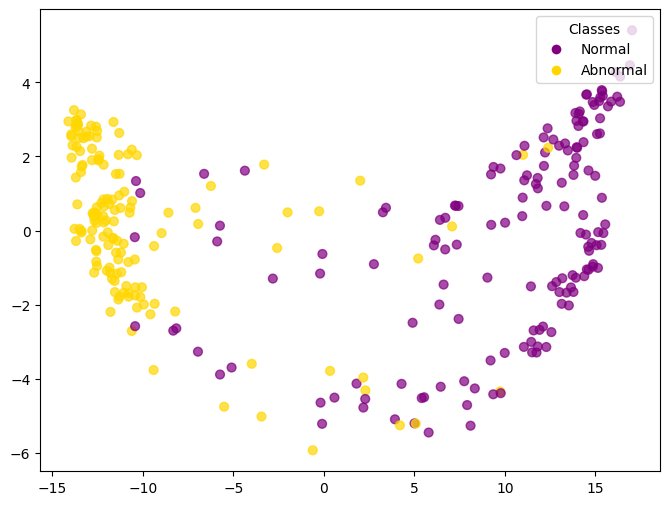

In [39]:
coronado_embeddings, coronado_labels, _, _ = get_camera_embeddings(camera_csvs['coronado'], "coronado")

data_vis.plot_data(coronado_embeddings, coronado_labels)

100%|██████████| 1580/1580 [00:00<00:00, 6954.02it/s]


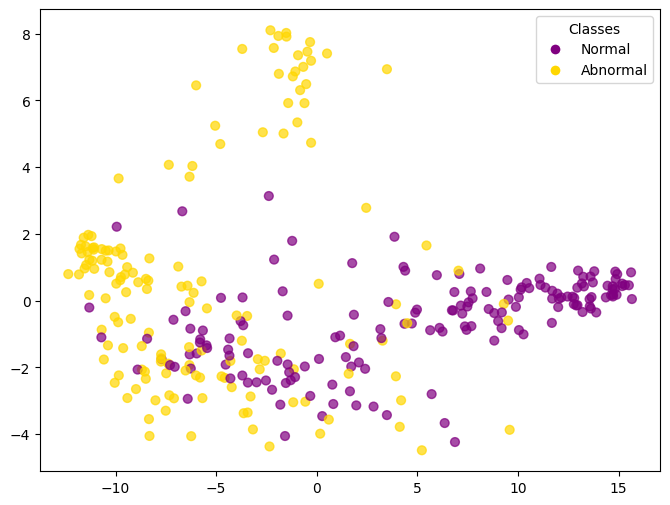

In [40]:
mesa_grande_embeddings, mesa_grande_labels, _, _ = get_camera_embeddings(camera_csvs['mesa_grande'], "mesa_grande")

data_vis.plot_data(mesa_grande_embeddings, mesa_grande_labels)

100%|██████████| 1550/1550 [00:00<00:00, 6703.85it/s]


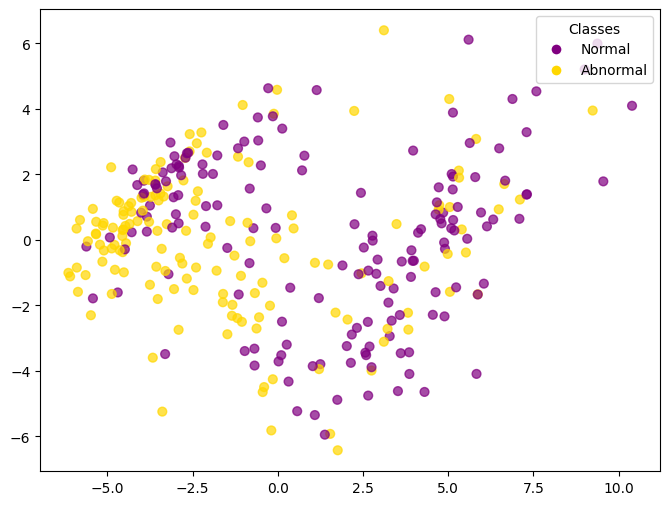

In [41]:
palomar_embeddings, palomar_labels, _, _ = get_camera_embeddings(camera_csvs['palomar'], "palomar")

data_vis.plot_data(palomar_embeddings, palomar_labels)

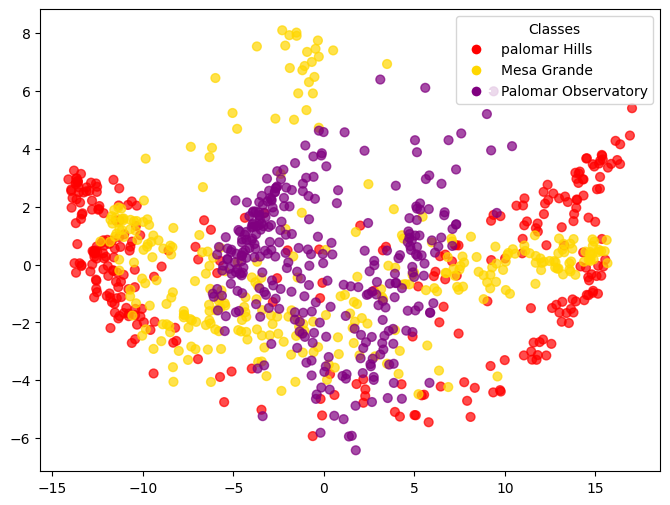

In [43]:
all_embeddings = np.concatenate([coronado_embeddings, mesa_grande_embeddings, palomar_embeddings])
all_labels = np.concatenate([coronado_labels, mesa_grande_labels, palomar_labels])
all_location_ids = np.concatenate([np.repeat(0, len(coronado_labels)), np.repeat(1, len(mesa_grande_labels)), np.repeat(2, len(palomar_labels))])


colors = {0 : 'red', 1 : "gold", 2 : 'purple'}
names = {0 : "palomar Hills", 1 : "Mesa Grande" , 2 : "Palomar Observatory"}

data_vis.plot_data(all_embeddings, all_location_ids, colors = colors, names = names)

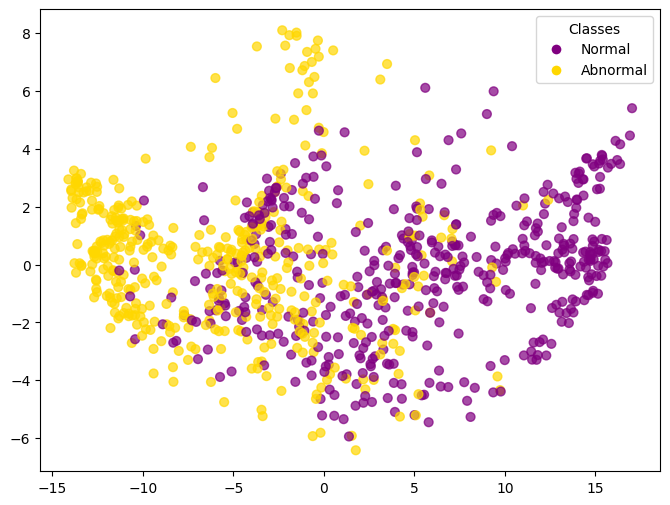

In [44]:
data_vis.plot_data(all_embeddings, all_labels)